In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
cd/content/gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [3]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic (7).csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [12]:
data = pd.read_csv("titanic.csv")
data = data.dropna(subset=['Age', 'Embarked'])  # drop missing
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # encode gender
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # encode port

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7972027972027972


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load and prepare Titanic dataset
data = pd.read_csv("titanic.csv")
data = data.dropna(subset=['Age', 'Embarked'])
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

# Define stacking classifier
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

# Train
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test)
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))


Stacked Model Accuracy: 0.7972027972027972


Logistic Regression Accuracy: 0.7972
Decision Tree Accuracy: 0.7203
Random Forest Accuracy: 0.8182
Stacked Model Accuracy: 0.8042


<ipython-input-17-49a996c57e36>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


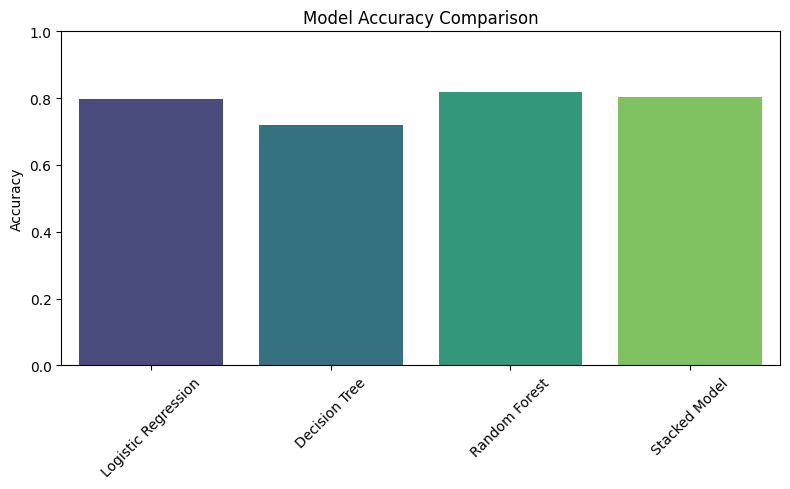

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load & prepare data
data = pd.read_csv("titanic.csv")
data = data.dropna(subset=['Age', 'Embarked'])
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

accuracies = {}

# Train & evaluate base models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Stacked model
stack_model = StackingClassifier(
    estimators=[
        ('rf', models["Random Forest"]),
        ('dt', models["Decision Tree"]),
        ('lr', models["Logistic Regression"])
    ],
    final_estimator=LogisticRegression()
)

stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
accuracies["Stacked Model"] = acc_stack
print(f"Stacked Model Accuracy: {acc_stack:.4f}")

# --- 📊 Plotting Section ---

# Bar Plot of Accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()

# Confusion Matrix for Stack


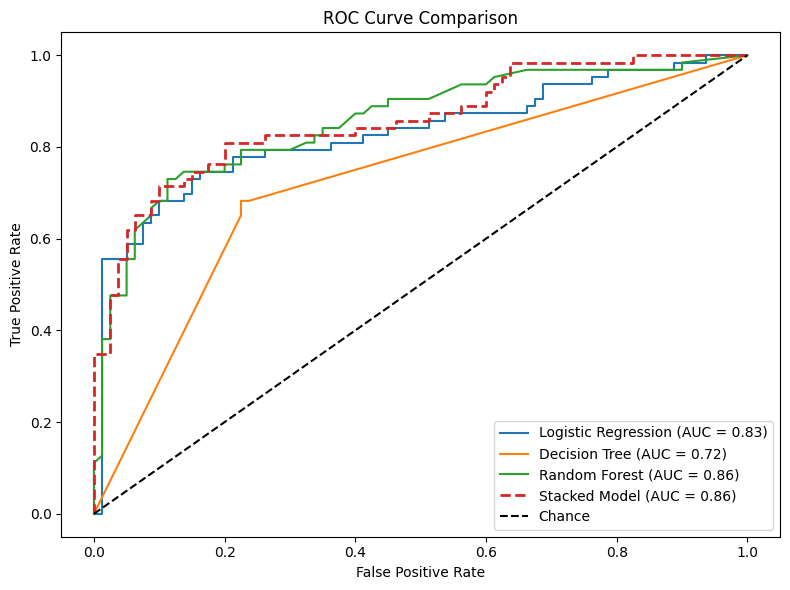

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Only binary classes needed for ROC
y_test_bin = y_test

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

# ROC for stacked model
y_prob_stack = stack_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bin, y_prob_stack)
plt.plot(fpr, tpr, label=f'Stacked Model (AUC = {auc(fpr, tpr):.2f})', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_comparison.png")
plt.show()


<ipython-input-20-ebc1451f8e17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette="crest")


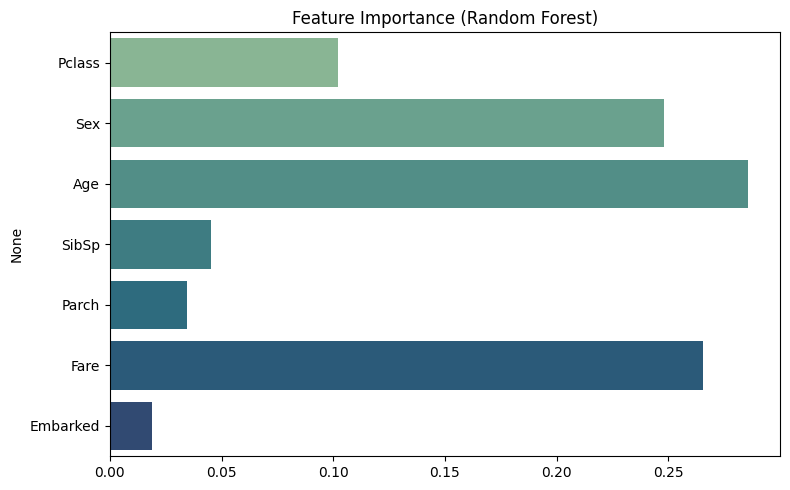

In [20]:
importances = models['Random Forest'].feature_importances_
feat_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feat_names, palette="crest")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig("feature_importance_rf.png")
plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import set_random_seed

# Set random seed for reproducibility
set_random_seed(42)

# Load and preprocess data
data = pd.read_csv("titanic.csv")
data = data.dropna(subset=['Age', 'Embarked'])  # Drop rows with missing values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode gender
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # Encode embarkation

# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Neural Network Accuracy: 0.8182


In [23]:
pip install pandas scikit-learn tensorflow


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Load data
data = pd.read_csv("titanic.csv")
data = data.dropna(subset=['Age', 'Embarked'])
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and labels
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for RNN: (samples, time_steps, features)
X_rnn = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)

# Build RNN
model = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(1, X.shape[1])),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("RNN Model Accuracy:", acc)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.5348 - loss: 0.7483 - val_accuracy: 0.6228 - val_loss: 0.6795
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6122 - loss: 0.6735 - val_accuracy: 0.7018 - val_loss: 0.6141
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6718 - loss: 0.6093 - val_accuracy: 0.7281 - val_loss: 0.5703
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7415 - loss: 0.5740 - val_accuracy: 0.7193 - val_loss: 0.5407
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7336 - loss: 0.5455 - val_accuracy: 0.7368 - val_loss: 0.5182
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7875 - loss: 0.5115 - val_accuracy: 0.7456 - val_loss: 0.5006
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7752 - loss: 0.5100 - val_accuracy: 0.7544 - val_loss: 0.4890
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7530 - loss: 0.5117 - val_accuracy: 0.7544 - val_loss:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
accuracies = {
    "Logistic Regression": 0.79,
    "Decision Tree": 0.69,
    "Random Forest": 0.76,
    "Stacked Model": 0.80,
    "ANN": 0.79,
    "RNN": 0.77
}


<ipython-input-25-e957fa81fa14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="mako")


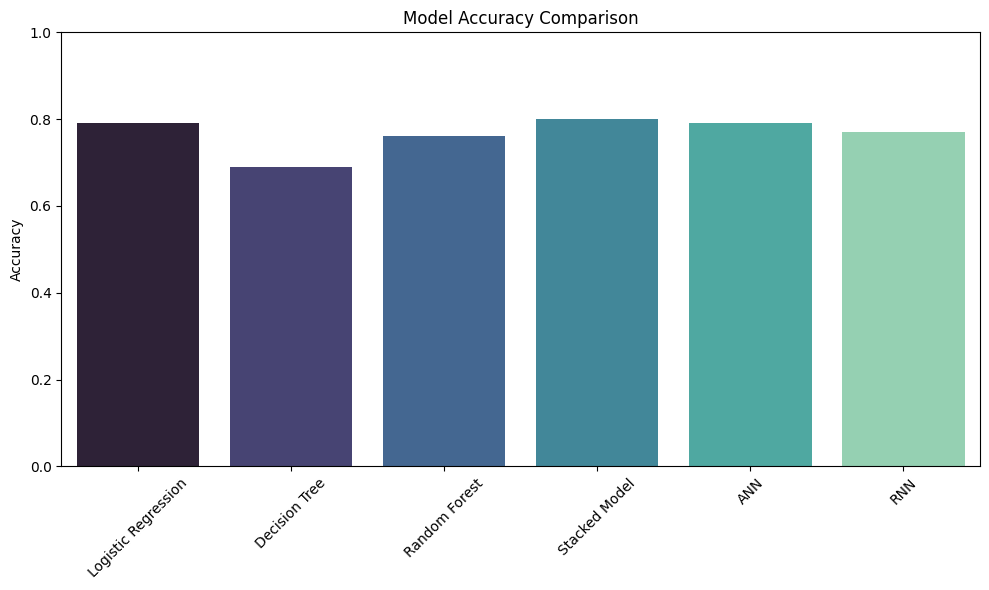

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="mako")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
